In [1]:
import pickle
import os
import re
import fnmatch
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []
    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    
    return results

# Training and Validation Curves

In [76]:
filebase = ("segment_datatest__epochs_1___hidden_100_5_LR_0-001000_ntrain_03_rot_00_results.pkl") #Select this ntraining number resultsresultsList = read_all_rotations('results/P1', filebase) #Read all of those into resultsList
resultsList = read_all_rotations('results', filebase) #Read all of those into resultsList


In [42]:
resultsList[0]['history']['sparse_categorical_accuracy']

[0.5626153945922852]

In [43]:
resultsList[0]['history']['val_sparse_categorical_accuracy']

[0.6231372952461243]

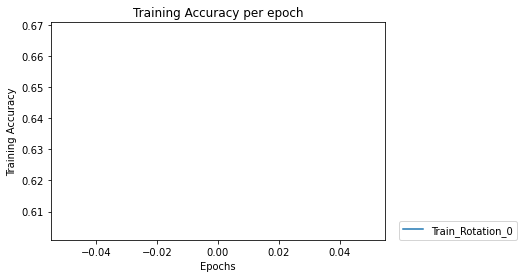

In [77]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['sparse_categorical_accuracy'], label=(("Train_Rotation_%s")%(str(i))))

plt.ylabel('Training Accuracy')
plt.xlabel('Epochs')
plt.title("Training Accuracy per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure1.png')
plt.show()

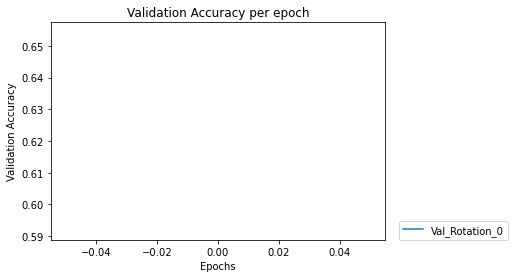

In [45]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['val_sparse_categorical_accuracy'], label=(("Val_Rotation_%s")%(str(i))))

plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title("Validation Accuracy per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure2.png')
plt.show()

# Confusion Matrices

# Histograms of Test Results

In [8]:
def getResults(resultsList, index):
    trainList = [] # Create an empty list to hold values
    valList = [] # Create an empty list to hold values
    testList = [] # Create an empty list to hold values

    for i in range(len(resultsList)): # For each result in the 5 rotations
        trainList.append(resultsList[i]['predict_training_eval'][index]) 
        valList.append(resultsList[i]['predict_validation_eval'][index]) 
        testList.append(resultsList[i]['predict_testing_eval'][index]) 
    
    return trainList, valList, testList
    

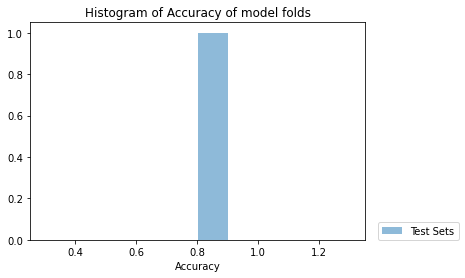

In [10]:
trainList, valList, testList = getResults(resultsList, 1)


plt.hist([testList], bins=10, alpha=0.5, label=['Test Sets'])
#plt.hist([complexModel], bins=10, alpha=0.5, label=['Complex Model'])
#plt.axvline(np.mean(testAcc), color='k', linestyle='dashed', linewidth=1, label='Mean Acc')
plt.legend(loc=(1.04,0))
plt.xlabel('Accuracy')
plt.title("Histogram of Accuracy of model folds")
plt.savefig('Figure8.png')
plt.show()

In [80]:
sample = resultsList[0]['sample']

In [88]:
sample[0]

array([0.27450982, 0.38039216, 0.34509805, 0.7058824 , 0.3529412 ,
       0.42745098, 0.4509804 , 0.76862746, 0.062625  , 0.06525   ,
       0.10825   , 0.0735    , 0.727625  , 0.376125  , 0.1685    ,
       0.736375  , 0.73075   , 0.053     , 0.05525   , 0.08      ,
       0.08      , 0.364875  , 0.32175   , 0.185375  , 0.697625  ,
       0.69675   ], dtype=float32)

In [ ]:
sample[0][0]

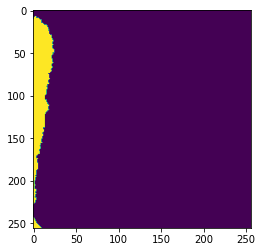

In [104]:
# Okay, first index is the batch number I think, then the second is 0,1 and those stand for image vs. true label. After that, inside the brackets is image, rows, columns 
#(then channels if looking at the real image). So I can't use this as it is I think. 
plt.imshow(sample[0][1][1,:,:]) 

# Images

In [78]:
ind=1

# This gives what the predicted labels are
prediction = resultsList[ind]['predict_training']
image = resultsList[ind]['sample'][0]
trueLabel = resultsList[ind]['sample'][1]

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 3
columns = 1# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(image[ind,:,:, 0:3])
plt.axis('off')
plt.title("Satellite")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(trueLabel[ind,:,:])
plt.axis('off')
plt.title("True Labels")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(prediction[ind,:,:])
plt.axis('off')
plt.title("Predicted Labels")

plt.savefig('Figure9.png')

IndexError: list index out of range